Importing the Dependencies

In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import FunctionTransformer
from sklearn.preprocessing import OneHotEncoder, LabelEncoder, StandardScaler
from sklearn.compose import ColumnTransformer
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score, confusion_matrix, matthews_corrcoef


Data Collection and Processing

In [2]:
# loading the dataset to pandas DataFrame
loan_dataset = pd.read_csv('loan_dataset.csv')

In [3]:
type(loan_dataset)

pandas.core.frame.DataFrame

In [4]:
# printing the first 20 rows of the dataframe
loan_dataset.head(20)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,NaN,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y
5,LP001011,Male,Yes,2,Graduate,Yes,5417,4196.0,267.0,360.0,1.0,Urban,Y
6,LP001013,Male,Yes,0,Not Graduate,No,2333,1516.0,95.0,360.0,1.0,Urban,Y
7,LP001014,Male,Yes,3+,Graduate,No,3036,2504.0,158.0,360.0,0.0,Semiurban,N
8,LP001018,Male,Yes,2,Graduate,No,4006,1526.0,168.0,360.0,1.0,Urban,Y
9,LP001020,Male,Yes,1,Graduate,No,12841,10968.0,349.0,360.0,1.0,Semiurban,N


In [5]:
# number of rows and columns
loan_dataset.shape

(614, 13)

In [6]:
# statistical measures
loan_dataset.describe()

,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History
count,614.000000,614.000000,592.000000,600.00000,564.000000
mean,5403.459283,1621.245798,146.412162,342.00000,0.842199
std,6109.041673,2926.248369,85.587325,65.12041,0.364878
min,150.000000,0.000000,9.000000,12.00000,0.000000
25%,2877.500000,0.000000,100.000000,360.00000,1.000000
50%,3812.500000,1188.500000,128.000000,360.00000,1.000000
75%,5795.000000,2297.250000,168.000000,360.00000,1.000000
max,81000.000000,41667.000000,700.000000,480.00000,1.000000


In [7]:
# number of missing values in each column
loan_dataset.isnull().sum()

Loan_ID               0
Gender               13
Married               3
Dependents           15
Education             0
Self_Employed        32
ApplicantIncome       0
CoapplicantIncome     0
LoanAmount           22
Loan_Amount_Term     14
Credit_History       50
Property_Area         0
Loan_Status           0
dtype: int64

In [8]:
categorical_cols = ['Gender', 'Married', 'Dependents',
                    'Self_Employed', 'Credit_History']

for col in categorical_cols:
    loan_dataset[col].fillna(loan_dataset[col].mode()[0], inplace=True)


In [9]:
numerical_cols = ['LoanAmount', 'Loan_Amount_Term']

for col in numerical_cols:
    loan_dataset[col].fillna(loan_dataset[col].median(), inplace=True)


In [10]:
loan_dataset.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [11]:
# printing the first 5 rows of the dataframe
loan_dataset.head()

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,Male,No,0,Graduate,No,5849,0.0,128.0,360.0,1.0,Urban,Y
1,LP001003,Male,Yes,1,Graduate,No,4583,1508.0,128.0,360.0,1.0,Rural,N
2,LP001005,Male,Yes,0,Graduate,Yes,3000,0.0,66.0,360.0,1.0,Urban,Y
3,LP001006,Male,Yes,0,Not Graduate,No,2583,2358.0,120.0,360.0,1.0,Urban,Y
4,LP001008,Male,No,0,Graduate,No,6000,0.0,141.0,360.0,1.0,Urban,Y


In [12]:
loan_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 614 entries, 0 to 613
Data columns (total 13 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   Loan_ID            614 non-null    object 
 1   Gender             614 non-null    object 
 2   Married            614 non-null    object 
 3   Dependents         614 non-null    object 
 4   Education          614 non-null    object 
 5   Self_Employed      614 non-null    object 
 6   ApplicantIncome    614 non-null    int64  
 7   CoapplicantIncome  614 non-null    float64
 8   LoanAmount         614 non-null    float64
 9   Loan_Amount_Term   614 non-null    float64
 10  Credit_History     614 non-null    float64
 11  Property_Area      614 non-null    object 
 12  Loan_Status        614 non-null    object 
dtypes: float64(4), int64(1), object(8)
memory usage: 62.5+ KB


Data Visualization

<Axes: xlabel='Education', ylabel='count'>

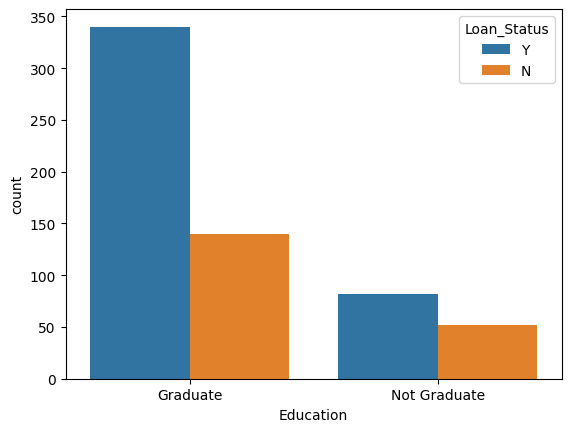

In [13]:
# education & Loan Status
sns.countplot(x='Education',hue='Loan_Status',data=loan_dataset)

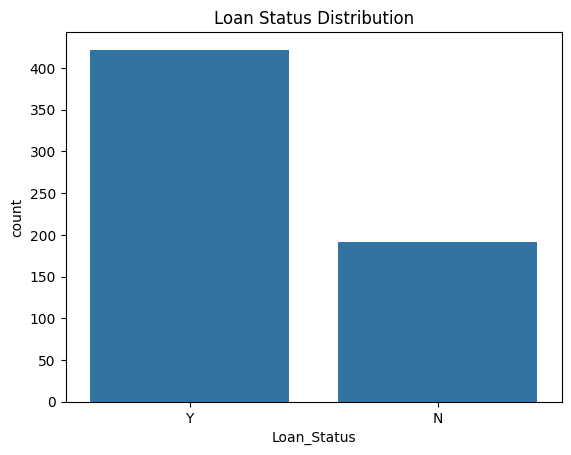

In [14]:
# Target variable distribution
sns.countplot(x="Loan_Status", data=loan_dataset)
plt.title("Loan Status Distribution")
plt.show()

<Axes: xlabel='Married', ylabel='count'>

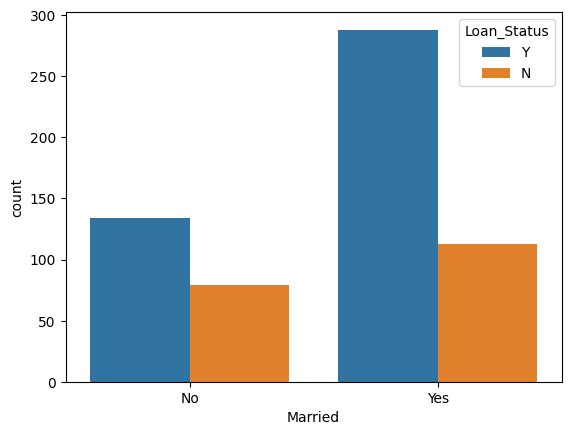

In [15]:
# marital status & Loan Status
sns.countplot(x='Married',hue='Loan_Status',data=loan_dataset)

<Axes: xlabel='Gender', ylabel='count'>

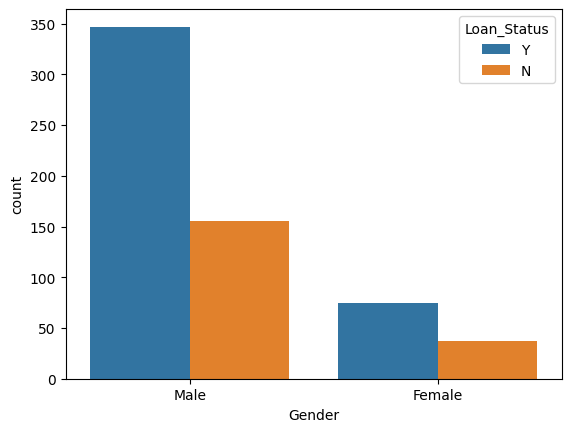

In [16]:
#Gender status & Loan Status
sns.countplot(x='Gender',hue='Loan_Status',data=loan_dataset)

In [17]:

# splitting the data and label
X = loan_dataset.drop(columns=['Loan_ID', 'Loan_Status'])
y = loan_dataset['Loan_Status'].map({'Y': 1, 'N': 0})  # binary target


X['Dependents'] = X['Dependents'].astype(str)

In [18]:
numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

In [20]:
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
num_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="median")),
    ("scaler", StandardScaler())
])

cat_pipeline = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="most_frequent")),
    ("onehot", OneHotEncoder(drop="first", handle_unknown="ignore"))
])

preprocessor = ColumnTransformer([
    ("num", num_pipeline, numerical_cols),
    ("cat", cat_pipeline, categorical_cols)
])

Train Test Split

In [21]:
X_train, X_test,y_train,y_test = train_test_split(X,y,test_size=0.1,stratify=y,random_state=2)

In [22]:
print(X.shape, X_train.shape, X_test.shape)

(614, 11) (552, 11) (62, 11)


### Training the model:

In [23]:
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.pipeline import Pipeline
from xgboost import XGBClassifier as xgb
from sklearn.metrics import accuracy_score, classification_report

In [24]:
def evaluate_model(model, X_test, y_test):
    # Predictions
    y_pred = model.predict(X_test)
    
    # Probabilities for AUC
    if hasattr(model, "predict_proba"):
        y_prob = model.predict_proba(X_test)[:, 1]
    else:
        y_prob = model.decision_function(X_test)

    metrics = {
        "Accuracy": accuracy_score(y_test, y_pred),
        "AUC": roc_auc_score(y_test, y_prob),
        "Precision": precision_score(y_test, y_pred),
        "Recall": recall_score(y_test, y_pred),
        "F1 Score": f1_score(y_test, y_pred),
        "MCC": matthews_corrcoef(y_test, y_pred)
    }

    return metrics


In [25]:
models = {
    "Logistic Regression": (
        LogisticRegression(max_iter=1000, class_weight='balanced'),
        {
            "classifier__C": [0.01, 0.1, 1, 10]
        }
    ),

    "Decision Tree": (
        DecisionTreeClassifier(random_state=42,class_weight='balanced'),
        {
            "classifier__max_depth": [3, 5, 10, None],
            "classifier__min_samples_split": [2, 5, 10]
        }
    ),

    "KNN": (
        KNeighborsClassifier(),
        {
            "classifier__n_neighbors": [3, 5, 7, 9]
        }
    ),

    "Naive Bayes": (
        GaussianNB(),
        {}
    ),

    "Random Forest": (
        RandomForestClassifier(random_state=42, class_weight='balanced'),
        {
           "classifier__n_estimators": [100, 200, 300],
            "classifier__max_depth": [5, 10, None],
            "classifier__min_samples_split": [2, 5],
            "classifier__min_samples_leaf": [1, 4],
            "classifier__max_features": ["sqrt"],

        }
    ),

    "XGBoost": (
        XGBClassifier(
            eval_metric="logloss",
            random_state=42,
        ),
        {
            "classifier__n_estimators": [200, 300, 400],
            "classifier__learning_rate": [0.01, 0.05, 0.1],
            "classifier__max_depth": [3, 5, 7],
            "classifier__subsample": [0.8, 1.0],
            "classifier__colsample_bytree": [0.8, 1.0],
            "classifier__reg_lambda": [1, 5, 10]
      }
    )
}

In [26]:
from sklearn.model_selection import GridSearchCV


best_models = {}
results = []

for name, (model, params) in models.items():
    print(f"\nTraining {name}...")

    pipe = Pipeline([
        ("preprocessor", preprocessor),
        ("classifier", model)
    ])

    grid = GridSearchCV(
        pipe,
        params,
        cv=5,
        scoring="f1",
        n_jobs=-1
    )

    grid.fit(X_train, y_train)

    # ✅ Store best model
    best_models[name] = grid.best_estimator_

    print(f"{name} best params:", grid.best_params_)
    print(f"{name} best CV score:", grid.best_score_)

    # ✅ Evaluate on test set
    metrics = evaluate_model(
        grid.best_estimator_,
        X_test,
        y_test
    )

    metrics["Model"] = name
    results.append(metrics)



Training Logistic Regression...
Logistic Regression best params: {'classifier__C': 0.01}
Logistic Regression best CV score: 0.8711186908606237

Training Decision Tree...
Decision Tree best params: {'classifier__max_depth': 3, 'classifier__min_samples_split': 2}
Decision Tree best CV score: 0.8376066264204919

Training KNN...
KNN best params: {'classifier__n_neighbors': 9}
KNN best CV score: 0.8724515891622115

Training Naive Bayes...
Naive Bayes best params: {}
Naive Bayes best CV score: 0.8621698451536437

Training Random Forest...
Random Forest best params: {'classifier__max_depth': 5, 'classifier__max_features': 'sqrt', 'classifier__min_samples_leaf': 1, 'classifier__min_samples_split': 5, 'classifier__n_estimators': 300}
Random Forest best CV score: 0.8685764200984922

Training XGBoost...
XGBoost best params: {'classifier__colsample_bytree': 0.8, 'classifier__learning_rate': 0.01, 'classifier__max_depth': 3, 'classifier__n_estimators': 200, 'classifier__reg_lambda': 1, 'classifier

In [27]:
results_df = pd.DataFrame(results)
results_df.set_index("Model", inplace=True)
results_df


,Accuracy,AUC,Precision,Recall,F1 Score,MCC
Model,,,,,,
Logistic Regression,0.790323,0.733170,0.800000,0.930233,0.860215,0.471332
Decision Tree,0.758065,0.729498,0.769231,0.930233,0.842105,0.374349
KNN,0.806452,0.733170,0.803922,0.953488,0.872340,0.515505
Naive Bayes,0.774194,0.758874,0.795918,0.906977,0.847826,0.431102
Random Forest,0.806452,0.791922,0.803922,0.953488,0.872340,0.515505
XGBoost,0.806452,0.773562,0.803922,0.953488,0.872340,0.515505


In [108]:
import joblib
import os

os.makedirs("model", exist_ok=True)

for name, model in best_models.items():
    file_name = name.lower().replace(" ", "_") + ".pkl"
    joblib.dump(model, f"model/{file_name}")